# TP1: Agrupamiento de imágenes

**Data Mining en Ciencia y Tecnología**

## 1. Introducción
El procesamiento de imágenes resulta desafiante por su alta dimensionalidad. La estructura de una imagen digital consiste en una matriz de NxM, en donde la subunidad constituyente de la matriz es un pixel que codifica información para un color particular. Cada pixel representa la intesidad de luz en ese punto, que generalmente varía entre [0,255], lo que es equivalente a 8 bits.
Para representar imágenes a colores, se utiliza un modelo de percepción humana, en donde el color resulta a través de un sistema aditivo. El modelo se basa en la teoría de los componentes primarios del color que son Rojo, Verde y Azul (RGB Red, Green and Blue, por sus siglas en inglés). Por consiguiente, para representar digitalmente una imagen color, se necesitan 3 matrices de NxM . Una para el Rojo, otra para el Verde y otra para el Azul.

## 2. Objetivos
Familiarizarse con el procesamiento de imágenes. Para ello, se proponen diferentes ma- nipulaciones que permitirán preparar el dataset para la detección y exploración de agrupa- mientos naturales.

## 3. Estructura de los datos:
A partir del siguiente link, se obtendrán las imágenes a color de 210 flores pertenecientes a 10 especies diferentes. Cada imagen consiste en un archivo .PNG de 128 pixeles de ancho por 128 pixeles de profundidad (128x128x3). Adicionlamente, se encuentra el archivo .CSV con las etiquetas (labels) que corresponden a la especie de cada imagen.

## 4. Preprocesamiento de los datos
- Cargar el dataset y sus respectivas etiquetas. Es importante asegurarse que las imágenes sean comparables en color, valor, rango y tamaño.
- Explorar y graficar los subconjuntos de imágenes que representan flores de la misma especie.

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance

In [ ]:
! kaggle datasets download -d olgabelitskaya/flower-color-images -p ../../data/raw
! unzip ../../data/raw/flower-color-images.zip -d ../../data/raw

In [2]:
images_path = '../../data/raw/flower_images/flower_images'
images = sorted(
    [os.path.join(images_path, file) for file in os.listdir(images_path ) if file.endswith('.png')]
)

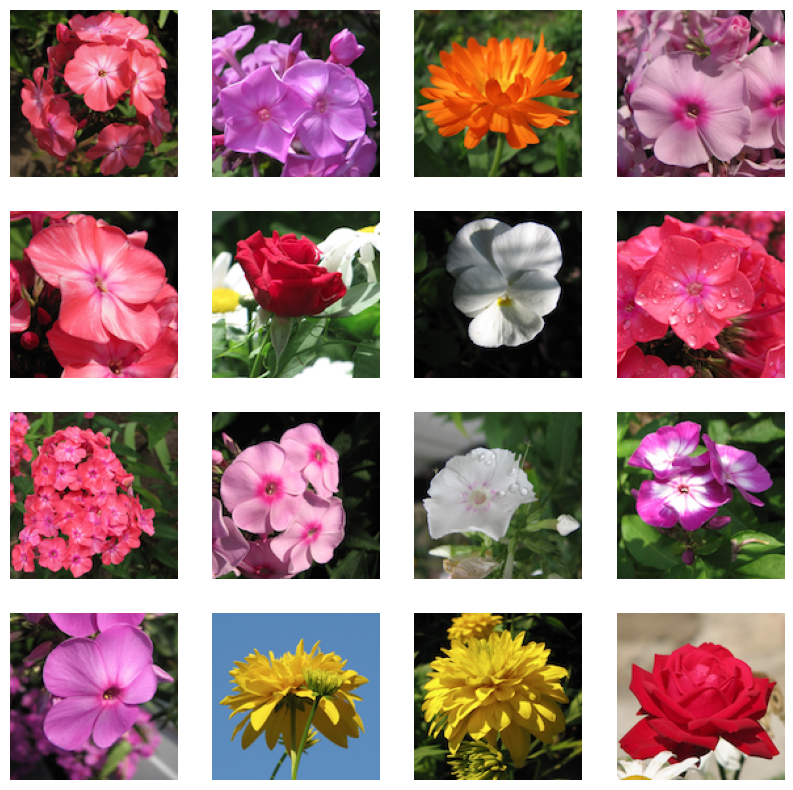

In [3]:
nrows=4
ncols=4
fig, axes = plt.subplots(nrows=nrows,ncols=ncols, sharex=True, sharey=True, figsize=(10,10))

axes = axes.flat
for i,image_path in enumerate(images[0:nrows*ncols]):
    image_ = Image.open(image_path)
    axes[i].imshow(image_)
    axes[i].axis('off')

## 5. Manipulación de datos
- Cambiar la intensidad de una de las imágenes en escala de grises, transformarla en una imagen con mucho y otra con poco brillo.

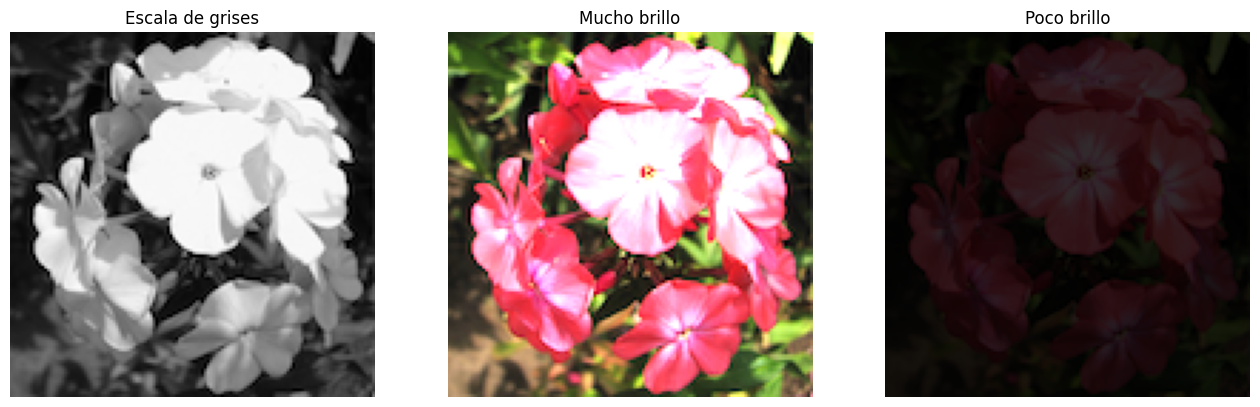

In [4]:
fig, axes = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(16, 9))

image_ = Image.open(images[0])
bright_enhancer = ImageEnhance.Brightness(image_)
image_gray = np.array(image_)[:,:,0]

axes[0].imshow(image_gray, cmap="gray")
axes[1].imshow(bright_enhancer.enhance(2.0))
axes[2].imshow(bright_enhancer.enhance(0.2))

axes[0].set_title("Escala de grises")
axes[1].set_title("Mucho brillo")
axes[2].set_title("Poco brillo")

axes[0].axis('off')
axes[1].axis('off')
axes[2].axis('off')
plt.show()

- Convertir una de las imágenes a blanco y negro (binario). ¿Es la única manera? Si existen otras transformaciones mostrar más de una conversión.

No es la única manera. Se puede usar `Pillow`, `cv2` o `numpy` para manipular la imagen.

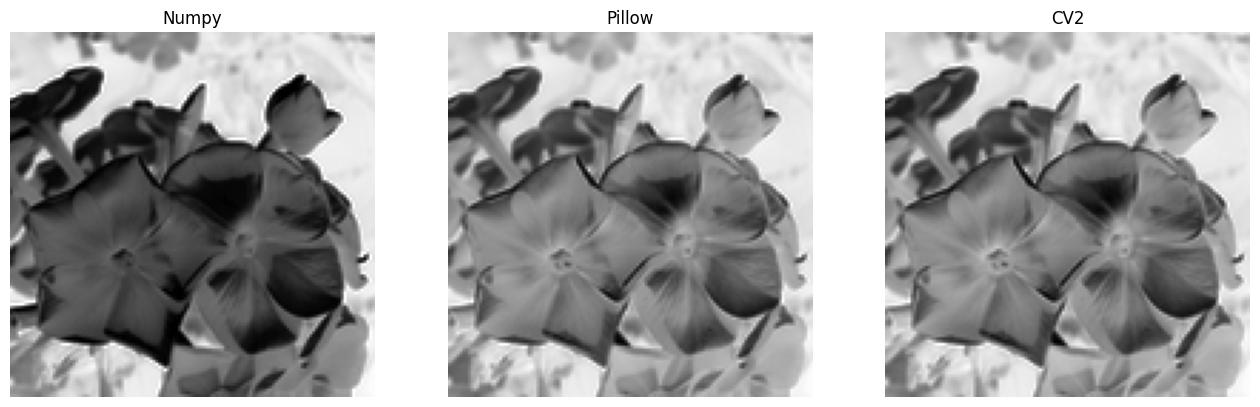

In [5]:
fig, axes = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(16, 9))

image_ = Image.open(images[1])
image_PIL =  image_.convert('L')

image_numpy = np.array(image_)[:,:,0]
image_numpy = image_numpy[:,:]

image_cv2 = cv2.imread(images[1])
image_cv2 = cv2.cvtColor(image_cv2, cv2.COLOR_RGB2GRAY)

axes[0].imshow(image_numpy, cmap='binary')
axes[1].imshow(image_PIL, cmap='binary')
axes[2].imshow(image_cv2, cmap="binary")

axes[0].set_title("Numpy")
axes[1].set_title("Pillow")
axes[2].set_title("CV2")

axes[0].axis('off')
axes[1].axis('off')
axes[2].axis('off')
plt.show()

- Recortar una parte significativa de la imagen, quedándose sólo con el círculo central de la misma.


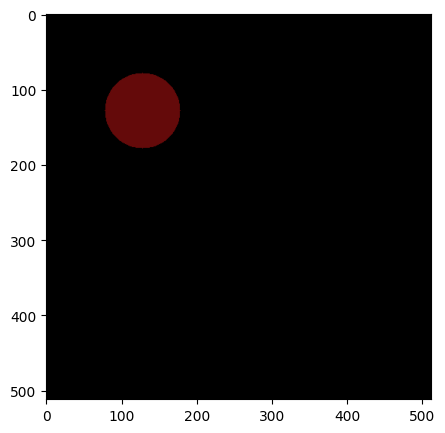

In [22]:
Img = np.zeros((512, 512, 3), np.uint8)
     
# Window name in which image is displayed
window_name = 'Image'
    
# Center coordinates
center_coordinates = (128, 128)
   
# Radius of circle
radius = 50
    
# Red color in BGR
color = (100, 10,10)
    
# Line thickness of -1 px
thickness = -2
    
# Using cv2.circle() method
# Draw a circle of red color of thickness -1 px
image = cv2.circle(Img, center_coordinates, radius, color, thickness)
    
# Displaying the image
plt.figure(figsize=(5,5))
plt.imshow(image)


- Generar dos imágenes random: una imagen mezclando los pixels y otra mezclando partes de diferentes imágenes.

- Aplicar dos tipos diferentes de filtros sobre una imagen, explique en qué casos conviene usar cada uno.

- Calcular imagen promedio global y el promedio entre las distintas especies. ¿Se pueden distinguir los promedios? ¿Cómo quedan los promedios si consideran las imágenes en blanco y negro?